In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
import os
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.datasets import load_breast_cancer

Text(0, 0.5, 'characteristic 1')

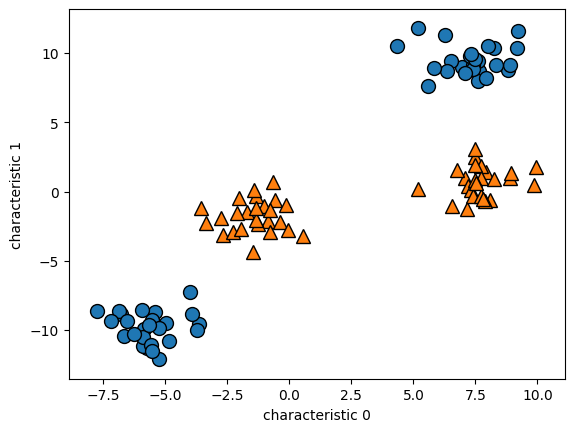

In [2]:
X, y = make_blobs(centers = 4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("characteristic 0")
plt.ylabel("characteristic 1")

Text(0, 0.5, 'characteristic 1')

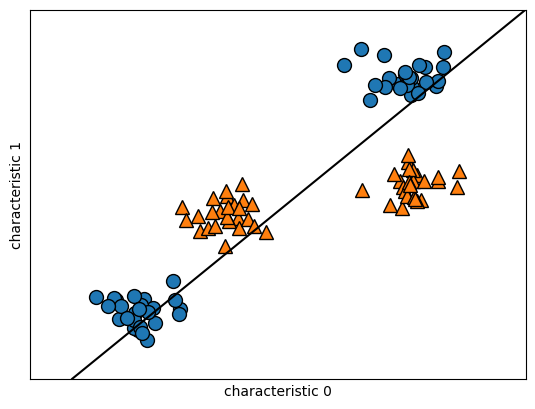

In [3]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter = 5000, tol=1e-3).fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("characteristic 0")
plt.ylabel("characteristic 1")

Text(0.5, 0, 'characteristic 1 ** 2')

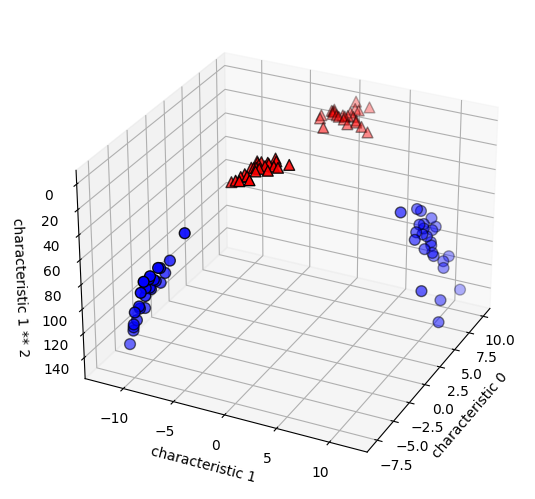

In [4]:
X_new = np.hstack([X,X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

if matplotlib.__version__ >= '3.4':
    ax = Axes3D(figure, elev=-152,azim=-26, auto_add_to_figure=False)
    figure.add_axes(ax)
else:
    ax = Axes3D(figure, elev=-152,azim=-26)

mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.set_xlabel("characteristic 0")
ax.set_ylabel("characteristic 1")
ax.set_zlabel("characteristic 1 ** 2")

Text(0.5, 0, 'characteristic 1 ** 2')

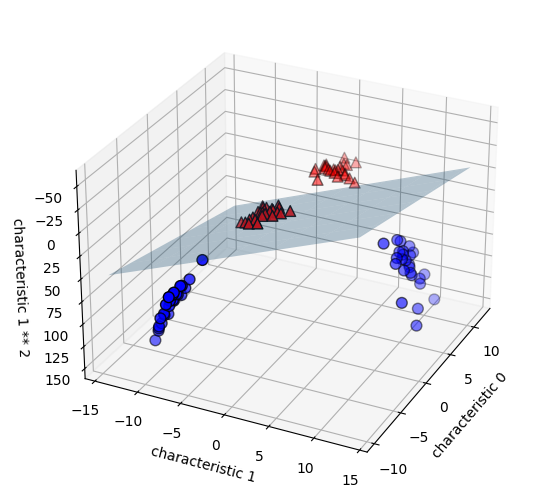

In [5]:
linear_svm_3d = LinearSVC(max_iter = 5000).fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
if matplotlib.__version__ >= '3.4':
    ax = Axes3D(figure, elev=-152,azim=-26, auto_add_to_figure=False)
    figure.add_axes(ax)
else:
    ax = Axes3D(figure, elev=-152,azim=-26)
xx = np.linspace(X_new[:,0].min() - 2,X_new[:,0].max() + 2,50)
yy = np.linspace(X_new[:,1].min() - 2,X_new[:,1].max() + 2,50)

XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX,YY,ZZ,rstride = 8, cstride=8,alpha=0.3)

ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker='^',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.set_xlabel("characteristic 0")
ax.set_ylabel("characteristic 1")
ax.set_zlabel("characteristic 1 ** 2")

Text(-0.03450018561929906, 0.5, 'characteristic 1')

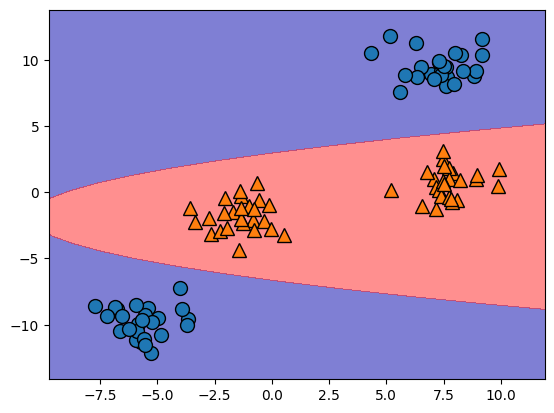

In [6]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
ax.set_xlabel("characteristic 0")
ax.set_ylabel("characteristic 1")

Text(0, 0.5, 'characteristic 1')

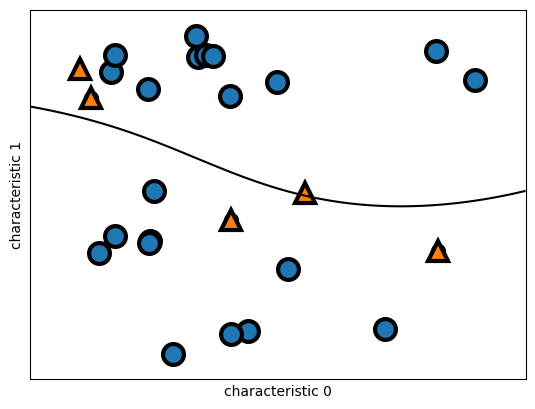

In [52]:
from sklearn.svm import SVC
import mglearn

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)

mglearn.discrete_scatter(X[:,0],X[:,1],y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
####
sv_labels = np.zeros(len(X), dtype=bool)
sv_labels[svm.support_] = True
###
mglearn.discrete_scatter(X[:,0],X[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("characteristic 0")
plt.ylabel("characteristic 1")

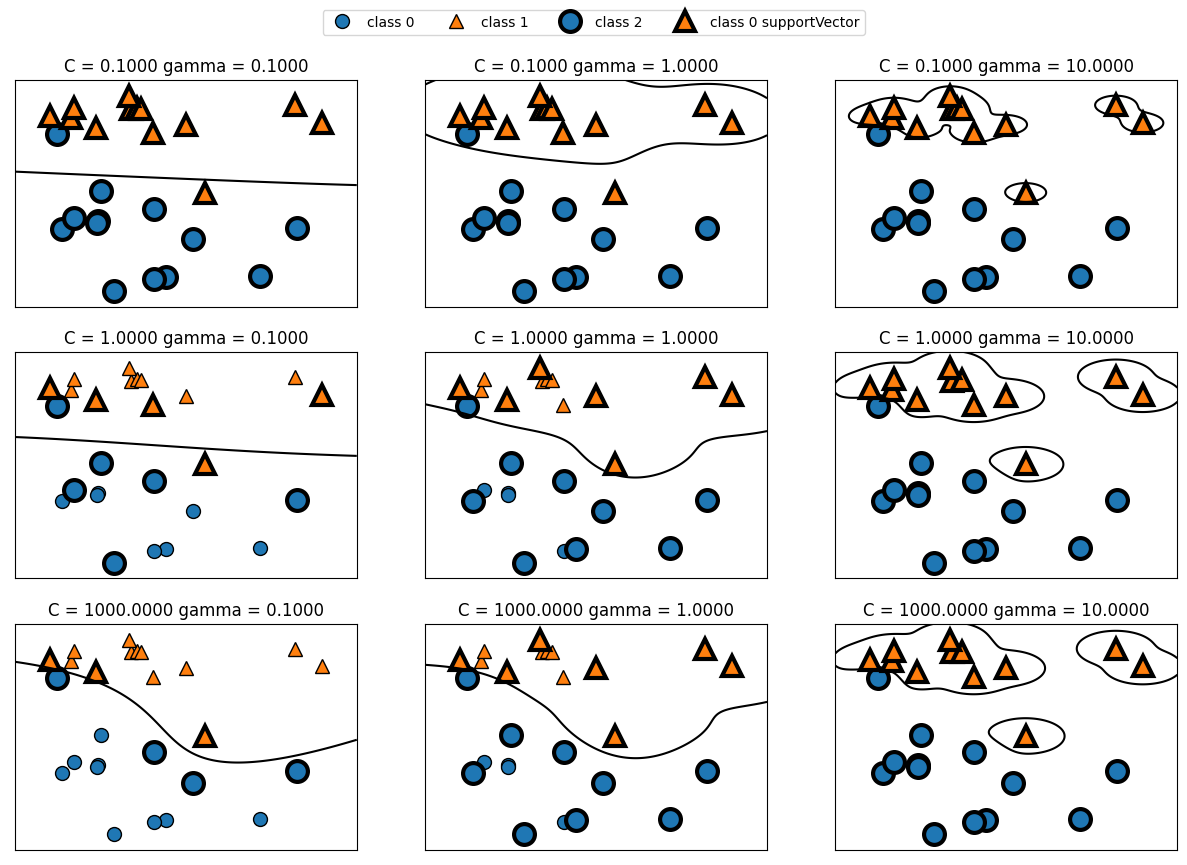

In [17]:
fig, axes = plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma,ax=a)
axes[0,0].legend(["class 0","class 1","class 2","class 0 supportVector","class 1 supportVector"], ncol=4,loc=(.9,1.2))

In [18]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)

print("training set accuracy: {:.3f}".format(svc.score(X_train, y_train)))
print("test set accuracy: {:.3f}".format(svc.score(X_test, y_test)))

training set accuracy: 0.923
test set accuracy: 0.916


Text(0, 0.5, 'Attribute size')

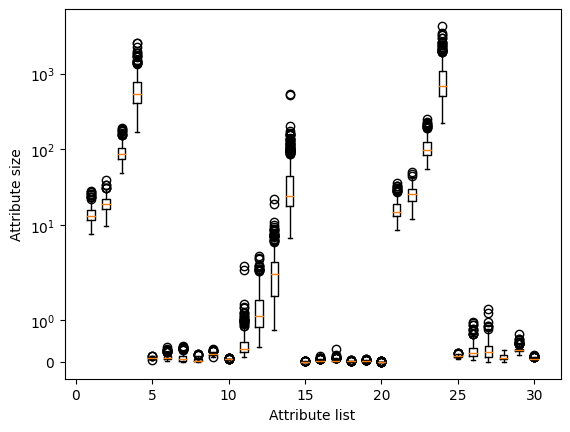

In [30]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Attribute list")
plt.ylabel("Attribute size")


In [31]:
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training) / range_on_training
print("min",X_train_scaled.min(axis=0))
print("max",X_train_scaled.max(axis=0))

min [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
max [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [32]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [45]:
svc = SVC(C=20)
svc.fit(X_train_scaled,y_train)
print("training set accuracy: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("test set accuracy: {:.3f}".format(svc.score(X_test_scaled, y_test)))

training set accuracy: 0.998
test set accuracy: 0.958
